**Practical 5**
Aim: Use Support Vector Machines to train your model and compare it with the other models
from experiment-3 including kernel trick.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
dataset = pd.read_csv('../input/fashion-mnist_train.csv')
labels = dataset['label'].values
features = dataset.drop(['label'],axis = 1).values
dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
model = svm.SVC(gamma = 'scale')
model.fit(features,labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix

test_dataset = pd.read_csv('../input/fashion-mnist_test.csv')
print(test_dataset.shape)
test_labels = test_dataset['label'].values
test_features = test_dataset.drop(['label'],axis = 1).values
y_pred = model.predict(test_features)
accuracy_score(test_labels, y_pred)
confusion_matrix(test_labels, y_pred)

(10000, 785)


array([[857,   0,  11,  28,   0,   2,  91,   0,  11,   0],
       [  2, 973,   3,  16,   0,   1,   5,   0,   0,   0],
       [ 10,   1, 823,  14,  86,   0,  62,   0,   4,   0],
       [ 27,   7,   7, 919,  22,   0,  17,   0,   1,   0],
       [  0,   0,  55,  27, 869,   0,  47,   0,   2,   0],
       [  0,   0,   0,   0,   0, 938,   1,  43,   3,  15],
       [151,   0,  81,  28,  57,   0, 675,   0,   8,   0],
       [  0,   0,   0,   0,   0,  20,   0, 943,   0,  37],
       [  5,   0,   5,   3,   1,   2,  10,   3, 970,   1],
       [  0,   0,   0,   0,   0,   9,   0,  37,   0, 954]])

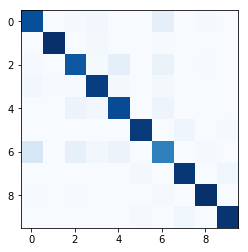

In [5]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)